In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df=pd.read_csv('height-weight.csv')

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


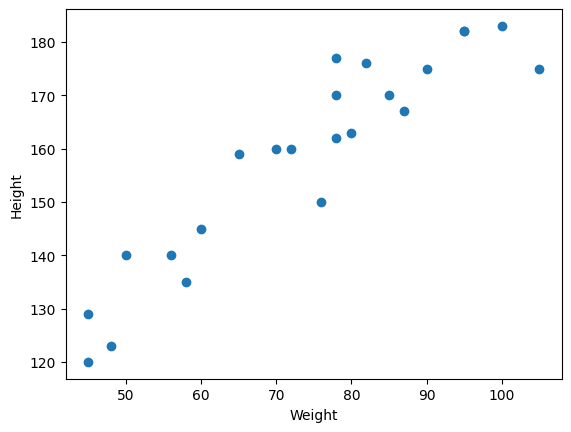

In [8]:
## let us draw scatterplot to understand more

plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [9]:
## to understand the relationship we have to find the correlation b/w the variables
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [10]:
## Independent and dependent Features

X=df[['Weight']] ### we have to use in the double square braket as single square braket forms the series instead of dataframe
Y=df['Height'] ## for dependent variable we have to keep them in series or 1-d array

In [11]:
x_series=df['Weight']  ## this act as series , so for training the model
## we should keep one thing in mind that the independent features should be in 2-d/dataframe
np.array(x_series).shape

(23,)

In [12]:
np.array(Y).shape


(23,)

In [13]:
### Train test split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
X_train.shape

(17, 1)

In [16]:
## standardization
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [18]:
X_test=scaler.transform(X_test)

In [19]:
X_test


array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [22]:

print("type:",type(regression))

type: <class 'sklearn.linear_model._base.LinearRegression'>


In [23]:
regression.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
print("Coeff or Slope: ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coeff or Slope:  [17.2982057]
Intercept :  156.47058823529412


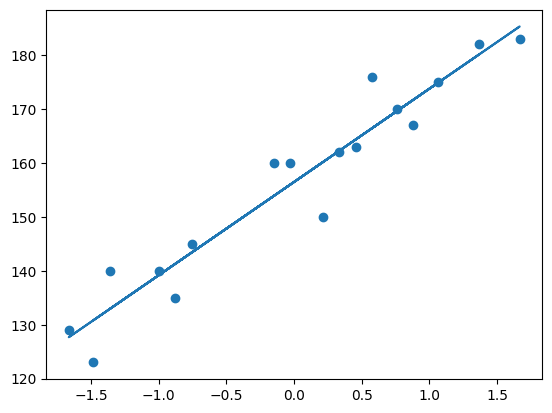

In [26]:
## Plotting the training training data and also the best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [28]:
y_pred=regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [35]:
## calculating the performance metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print(mae)
print(mse)
print(np.sqrt(mse))
print(r2)

9.66512588679501
114.84069295228699
10.716374991212605
0.7360826717981276


In [37]:
regression.predict(scaler.transform([[62]]))

c:\Users\ghali\OneDrive\Desktop\ml\python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([145.49819678])